# Practical Linear Regressions

## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Load Raw Data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing
#### Exploring the descriptive stats of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


From the describe output, we can see that the count of values for each of the categories are not aligned. Price and Engine Volume seem to be missing some values while the max amount of observations total 4345. Also the amount of unique models classified number in the 300's which would require 300+ dummy variables which already tell us that the category may be unfit for a regression model while Registration appears to have mostly "Yes" entries that will not allow for much benefit to the model.

#### Determining variables of interest

In [4]:
data = raw_data.drop(['Model'], axis =1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Deal with missing values - Rule of Thumb: If yo uare removing less then 5% of observations, you are free to remove all of those that have missing values

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis = 0)

**Pandas.DataFrame.axis:** 0 = rows or observations; 1 = columns or features

**Pandas.DataFrame.isnull:** = identifies features with observations that have NULL values

**Pandas.DataFrame.dropna:** drops NULL values

## Exploring the PDFs

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


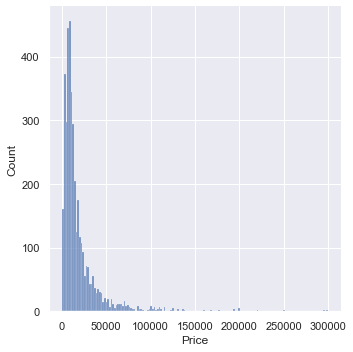

In [7]:
sns.displot(data_no_mv['Price'])

The long tail distribution proves that price does not follow a normal distribution and has huge outliers. This will effect the coefficients dramatically. One way to deal with this is to remove 1% of observations.

**DataFrame.quantile(the quantile):** returns the value at a given quantile (=np.percentile)

In [8]:
q = data_no_mv['Price'].quantile(0.99)
data_1= data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


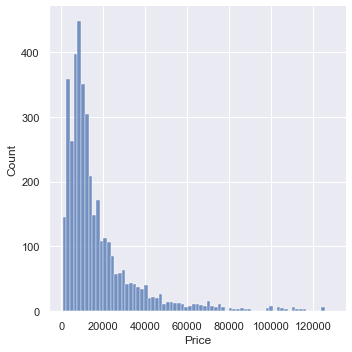

In [9]:
sns.displot(data_1['Price'])

When removing the 1% of outliers using quatile method, we get a better distribution of prices. While $129K is still very outside of the mean, it is acceptably closer. We will take a look at the other feature distributions to make sure that they are also falling within acceptable ranges:

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


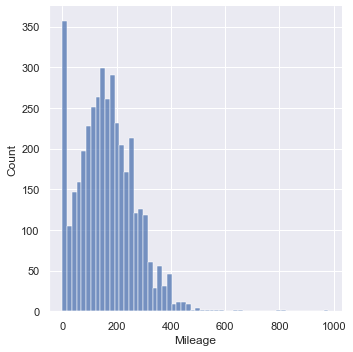

In [10]:
sns.displot(data_no_mv['Mileage'])

In [11]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


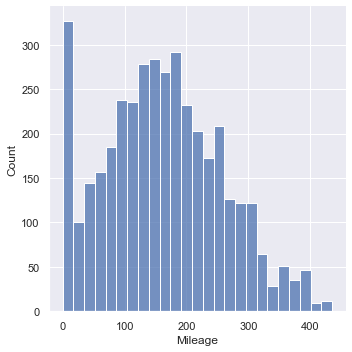

In [12]:
sns.displot(data_2['Mileage'])

We can see that after removing 1% of outliers from the Mileage feature observations, it starts to look more like a normal distribution, increasing likelihood of having a more accurate model.

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


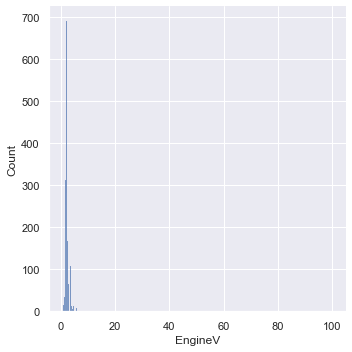

In [13]:
sns.displot(data_no_mv['EngineV'])

Engine Volume appears to have an odd distribution. When looking up [Engine Volume](https://en.wikipedia.org/wiki/Engine_displacement) we see that average ranges fall between 0.6 to 6.5. Since we have an idea of what the natural domain of engine volume values are, we will remove the values that sit above 6.5 as they would be deemed incorrect or false observations.

In [14]:
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


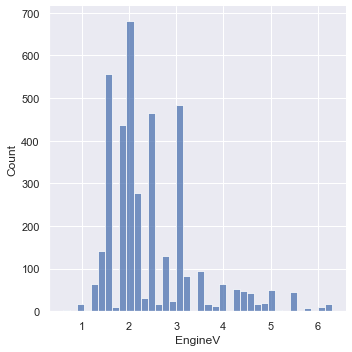

In [15]:
sns.displot(data_3['EngineV'])

Post-removal of Engine Volume > 6.5, we can see that the distribution of the observations within the Engine feature are more normally distributed. Now we will look at Year:

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


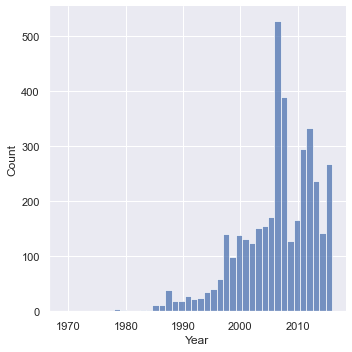

In [16]:
sns.displot(data_3['Year'])

Looks like the outliers here lay in the 1% percentile of the dataset. We can remove these as well to aim for a normal distribution:

In [17]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


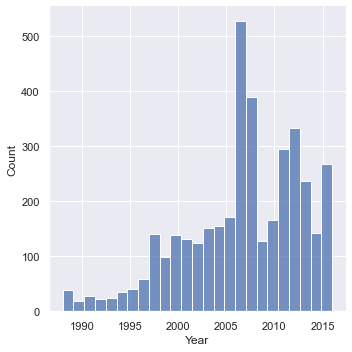

In [18]:
sns.displot(data_4['Year'])

Since we have cleaned the data and removed outliers from the data set, we will need to reset the index as the index of the original dataframe has carried over to our cleaned dataset data_4. 

**Pandas.DataFrame.reset_index():** resets the index of the dataframe to only describe data useful for the analysis. drop=True completely forgets the old index

In [19]:
data_cleaned = data_4.reset_index(drop=True)

## Check OLS Assumptions

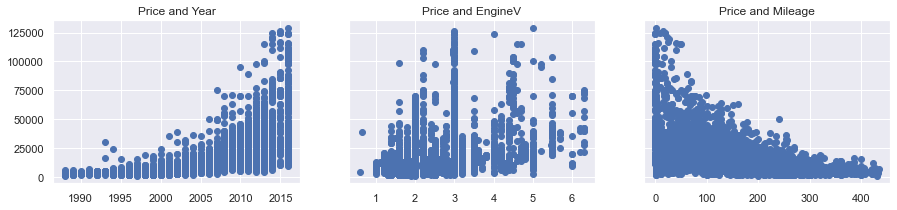

In [20]:
#Check for linearity using scatterplot:
f, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

We can spot patterns, but not linear ones. These appear to be quite exponential in nature (Year and Mileage in relation to Price), and Engine Volume doesnt appear to have an immediate pattern. This calls for us to normalize the data

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


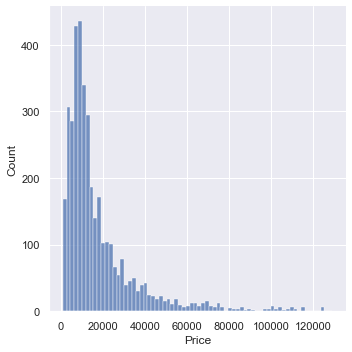

In [21]:
sns.displot(data_cleaned['Price'])

**np.log(x):** returns the natural logarithm of a number or an array of numbers

## Relaxing Assumptions

In [22]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

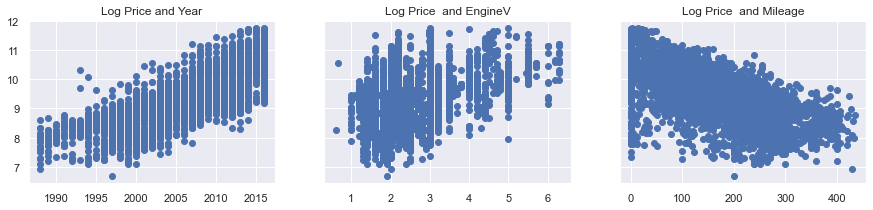

In [23]:
#Check for linearity using scatterplot:
f, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price  and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price  and Mileage')
plt.show()

We can see after taking the log of the dependent variable, Price, we see a much more linear relationship. At this point, we will drop the orignal Price feature from the dataframe as it is no longer needed:

In [24]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1)

## Other Assumptions:

**No Endogeneity:** Assumption is non-violated
**Normality and Homoscedasticity:** 

Normality is assumed for a big sample following the Central Limit Theorem (CLT).

Zero Mean is accomplished through the inclusion of a constant (intercept) within the regression formula

Homoscedasticity assumption generally holds as we can see a linear-type relationship from the features plotted against the dependent variable after taking the log of Price.

**No Autocorrelation AKA no serial correlation:** We already know that the data is not coming from time series or panel data.

## Multicollinearity

It is logical to assume that Year and Mileage are going to be correlated. The older the car, the more likely it has more miles on it. Unfortunately, SKLearn does not have the ability to check for multicollinearity so we must to back to Statsmodels.

**Variance Inflation Factor (VIF):** VIF produces a measure which estimates how much larger the square root of the standard error of an estimate is. The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable, given by exog_idx is added to the linear regression. It is a measure for multicollinearity of the design matrix, exog.

[Note on Multicollinearity](https://statisticalhorizons.com/multicollinearity/)

[**statsmodels.stats.outliers_influence.variance_inflation_factor**](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)

In [25]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#define the features you want to check for multicollinearity
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

### How to Read the VIF Table:

**VIF = 1:** No multicollinearity. The minimum value of the measure

**1 < VIF < 5:** Perfectly okay

**10 < VIF:** Unacceptable

**Variance Inflation Factor Calculation:** $(\frac{1}{1-R^2})$

It’s called the variance inflation factor because it estimates how much the variance of a coefficient is “inflated” because of linear dependence with other predictors. Thus, a VIF of 1.8 tells us that the variance (the square of the standard error) of a particular coefficient is 80% larger than it would be if that predictor was completely uncorrelated with all the other predictors.

The VIF has a lower bound of 1 but no upper bound. Authorities differ on how high the VIF has to be to constitute a problem. Personally, I tend to get concerned when a VIF is greater than 2.50, which corresponds to an R2 of .60 with the other variables.

Regardless of your criterion for what constitutes a high VIF, there are at least three situations in which a high VIF is not a problem and can be safely ignored:

1. The variables with high VIFs are control variables, and the variables of interest do not have high VIFs. Here’s the thing about multicollinearity: it’s only a problem for the variables that are collinear. It increases the standard errors of their coefficients, and it may make those coefficients unstable in several ways. But so long as the collinear variables are only used as control variables, and they are not collinear with your variables of interest, there’s no problem. The coefficients of the variables of interest are not affected, and the performance of the control variables as controls is not impaired.

Here’s an example from some of my own work: the sample consists of U.S. colleges, the dependent variable is graduation rate, and the variable of interest is an indicator (dummy) for public vs. private. Two control variables are average SAT scores and average ACT scores for entering freshmen. These two variables have a correlation above .9, which corresponds to VIFs of at least 5.26 for each of them. But the VIF for the public/private indicator is only 1.04. So there’s no problem to be concerned about, and no need to delete one or the other of the two controls.

2. The high VIFs are caused by the inclusion of powers or products of other variables. If you specify a regression model with both x and x2, there’s a good chance that those two variables will be highly correlated. Similarly, if your model has x, z, and xz, both x and z are likely to be highly correlated with their product. This is not something to be concerned about, however, because the p-value for xz is not affected by the multicollinearity.  This is easily demonstrated: you can greatly reduce the correlations by “centering” the variables (i.e., subtracting their means) before creating the powers or the products. But the p-value for x2 or for xz will be exactly the same, regardless of whether or not you center. And all the results for the other variables (including the R2 but not including the lower-order terms) will be the same in either case. So the multicollinearity has no adverse consequences.

3. The variables with high VIFs are indicator (dummy) variables that represent a categorical variable with three or more categories. If the proportion of cases in the reference category is small, the indicator variables will necessarily have high VIFs, even if the categorical variable is not associated with other variables in the regression model.

Suppose, for example, that a marital status variable has three categories: currently married, never married, and formerly married. You choose formerly married as the reference category, with indicator variables for the other two. What happens is that the correlation between those two indicators gets more negative as the fraction of people in the reference category gets smaller. For example, if 45 percent of people are never married, 45 percent are married, and 10 percent are formerly married, the VIFs for the married and never-married indicators will be at least 3.0.

Is this a problem? Well, it does mean that p-values for the indicator variables may be high. But the overall test that all indicators have coefficients of zero is unaffected by the high VIFs. And nothing else in the regression is affected. If you really want to avoid the high VIFs, just choose a reference category with a larger fraction of the cases. That may be desirable in order to avoid situations where none of the individual indicators is statistically significant even though the overall set of indicators is significant.

In [27]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In the above table, we can see that VIF is high in Year, while Engine V has a score that is decently less than unacceptable, but not in the range of being perfectly okay. There is contention among statisticians and data scientists alike on what is acceptable and unacceptable with widely different ranges or philosophies, but for this example, we will take anything less than 10 as acceptable.

In [28]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

## Create Dummy Variables

**Pandas.get_dummies(df[,drop_first]):** Spots all categorical variables and creates dummies automatically! drop_first = True must be set to true in order to drop 1 from the N-1 of the dummy variables needed 

In [29]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [30]:
data_with_dummies.replace({False: 0, True: 1}, inplace=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


Check VIF of all of the categorized features:



In [31]:
variables = data_with_dummies[['Mileage','EngineV','Brand_BMW','Brand_Mercedes-Benz','Brand_Mitsubishi',
                               'Brand_Renault','Brand_Toyota','Brand_Volkswagen','Body_hatch','Body_other',
                               'Body_sedan','Body_vagon','Body_van','Engine Type_Gas','Engine Type_Other','Engine Type_Petrol',
                               'Registration_yes']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [32]:
vif

,VIF,features
0,4.459662,Mileage
1,7.841729,EngineV
2,2.294007,Brand_BMW
3,2.868649,Brand_Mercedes-Benz
4,1.641712,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162166,Brand_Toyota
7,2.844515,Brand_Volkswagen
8,1.464260,Body_hatch
9,1.534059,Body_other


## Rearrange Columns:

In [33]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [35]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

#### Declare the inputs and target

In [36]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

#### Scale the data

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs).get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [38]:
#Not usually recommended to standardize the dummy variables
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

Scaling has no effect on the predictive power of dummies. Once scaled though, they lose all of their dummy meaning.

#### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state=42)

#### Create the Regression

In [40]:
reg = LinearRegression()
reg.fit(x_train, y_train).get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Predictions of the linear model are explained by $\hat{y}$ in the Linear Regression Formula: $\hat{y} = {\\beta}_{0} + x_{1}{\\beta}_{1} + x_{2}{\\beta}_{2} +...x_{k}{\\beta}_{k}+{\\varepsilon}$

In [41]:
y_hat = reg.predict(x_train)

Sense check on y_train vs y_hat values. A 1:1 relationship is what we are looking for to see how close the dependent variables match up to the predicted values.

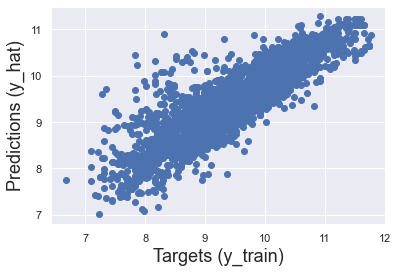

In [42]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.show()

The closer our scatterplot is to a 45 degree line, the better the model for Linear Regressions. Our results are not perfect, but it is not random, so the model passes the first test, but now we will be looking at residuals:

**Residuals:** Differences between the targets and the predictions.

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Residuals PDF')

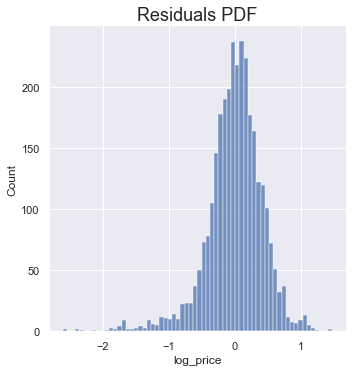

In [43]:
#plotting residuals
sns.displot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

From the Regression assumptions, we know that the results have to be normally distributed with a mean of 0. Residuals are estimates of the errors. Results look normal and the mean looks normal as it sits at 0. The only cause for concern is the tail. There are certain observations for which (y_train - y_hat) is much lower than the mean (a much higher price is predicted than observed). The predictions are overestimating compared to the target, but the majority of the predictions sit closer to the mean. 

Finally let's calculate the $R^2$

In [44]:
reg.score(x_train, y_train)

0.7546487921881218

The $R^2$ is 75.46%, which means that the model explains about 75% of the variability of the data. This is a relatively good results, but it can be better.

#### Finding the Weights and Bias

In [45]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


From the summary table, we can see that the model is far form interpretable and the features have been transformed via log. 

### Weights Interpretation:*

**Continuous Variables:**
1. Positive weight shows that as a feature increases in value, so do the log of the dependent variable (log_price in this example) and the depdendent variable ('Price') respectively. In this example, 'EngineV' has a positive relationship to price.
2. Negative Weight shows that as a feature increases in negative value, the log of the dependent variable (log_price in this example) and the depdendent variable ('Price') decrease respectively. Mileage is a prime example here. The more a car is driven, the lower the price gets

**Dummy Variables:**
1. A positive weight shows that the respective category (Brand in this case) is MORE expensive than the benchmark (Audi in this case. Meaning BMW and Benz could be HIGHER on average than Audi in price due to their positive weight).
2. A negative weight shows that the respective category (Brand in this case) is LESS expensive than the benchmark (Audi in this case. Meaning other non-luxe brands would be LOWER on average than Audi in price due to their negative weight).

In [46]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

There were 7 Brands as seen above, by looking at the weights table, we know that Audi is missing as it was dropped when applying pd.get_dummies (when all other brand weights are 0)

In [47]:
print(data_cleaned['Body'].unique())
print(data_cleaned['Engine Type'].unique())

['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch']
['Petrol' 'Diesel' 'Gas' 'Other']


For Body, we have crossovers as the benchmark while Engine Type has Diesel as their benchmark. Looking at the weights, we can infer that with Diesel as the benchmark, diesel cars run slightly more expensive relative to their Petrol, Gas, and Other Engine Type counterparts while Crossover body types also have tend to run slightly more expensive than their other body type counterparts, but unclear as to how much this affects the price relatively.

What we do know is that Mileage has the largest impact on price by 2X+ the Engine Volume, making these coefficients have the largest impact on the price of the car (from a common sense standpoint, this makes sense!)

## Testing

In [48]:
y_hat_test = reg.predict(x_test)

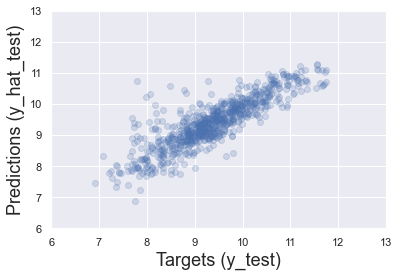

In [49]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

When looking at the chart, we can see that the model is a bit more accurate at predicting higher priced cars. However, when looking at the lower prices, they are a bit more scattered. From personal first glance understanding of cars, there can be vintage or collectors cars that can also have more value even at higher mileages.

When looking at the points with a graphical opacity of points, we can see that most of the values sit in the 45 degree line and there is a higher concentration of predicted values that sit closer to the test values.

**plt.scatter(x,y,[,alpha]):** alpha shows the proportional opacity of the points. alpha takes values from 0 to 1 with 1 being the default. This turns graphs into a heatmap of sorts; the more saturated the color, the higher the concentration of points while the paler the color, the less concentrated the points.

In [50]:
df_pf = pd.DataFrame(y_hat_test, columns = ['Prediction'])
df_pf.head()

,Prediction
0,10.607063
1,8.981794
2,8.658221
3,9.186643
4,8.857567


The showcased Predictions are log(Prices). If we want to reverse this we would use the formula:

exp(ln(x)) = |x| (for a positive x)

log(exp(x)) = x

An easy way to replace this is using the numpy.exp declaration

In [51]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])
df_pf.head()

,Prediction
0,40419.308971
1,7956.895960
2,5757.284408
3,9765.810605
4,7027.363814


In [52]:
#Reset the index of the y_test as the df will try to preserve this and will lead to output errors
y_test = y_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0
...,...,...
769,4699.586013,4200.0
770,9123.067372,8800.0
771,6267.803094,4850.0
772,20906.128600,27000.0


In [57]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [58]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


The minimum difference in percentages is .02% in this example. The max difference in percentages is pretty off the mark. Apart from the mins and maxes the percentiles and for most of the predictions, we got pretty close.

In [61]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
387,13602.75,13600.00,-2.75,0.02
74,28889.06,28900.00,10.94,0.04
314,35530.21,35500.00,-30.21,0.09
336,11313.27,11300.00,-13.27,0.12
425,2995.68,3000.00,4.32,0.14
262,52180.11,52055.25,-124.86,0.24
674,3107.51,3100.00,-7.51,0.24
648,9675.57,9700.00,24.43,0.25
79,21407.59,21335.00,-72.59,0.34
313,9865.72,9900.00,34.28,0.35


On average, our model is pretty decent at predicting the price; for the last samples predicted however, the predictions are much higher than the targets, which speaks back to the following graph:

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Residuals PDF')

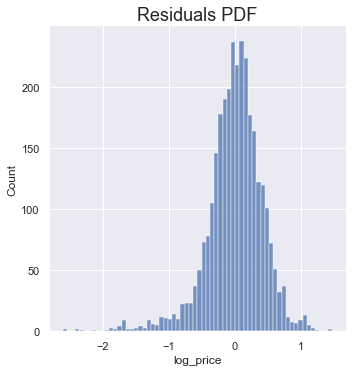

In [62]:
#plotting residuals
sns.displot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

All residuals are negative which means their predictions are higher than the targets. It may be the model of the car, which we chose to remove due to the fact that it had to generate more than 500+ dummies to accomplish, or it could be that the car was damaged in some way (which was missing from the dataset).

### How to Improve Models
1. Use a different set of variables
2. Remove bigger parts of the outliers
3. Use different kinds of transformations

ML requires us to visit models many times over the course of many months for a better model